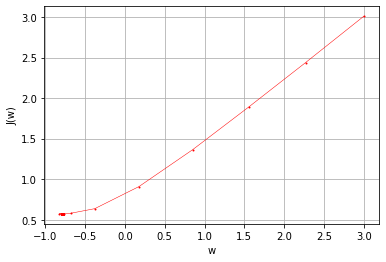

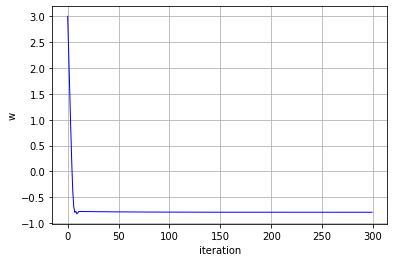

In [35]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv
import itertools

class Batch_Training:
    def __init__(self):
        # data number
        self.n = 40
        # noise
        self.omega = np.random.randn()
        self.noise = np.random.randn(self.n)
        # 正則化項の係数
        self.lamda = 0.01
        # 重み
        self.w = 3
        # iteration number
        self.iteration = 300
        # 2次元入出力データ
        self.x = np.random.randn(self.n, 2)
        self.y = 2 * (self.omega * self.x[:, 0] + self.x[:, 1] + self.noise > 0) - 1
    
    def main(self):
        self.w_stack    = []
        self.eval_stack = []
        lip = 7 * np.max(self.x[:, 0] ** 2)
    
        for t in range(self.iteration):
            J = 1 / self.n * np.sum(np.maximum(0, 1 - self.y * (self.w * self.x[:, 0] + self.x[:, 1]))) + self.lamda * (self.w ** 2 + 1)
            self.eval_stack.append(J)
            self.w_stack.append(self.w)
            index  = np.where(self.y * (self.w * self.x[:, 0] + self.x[:, 1]) < 1.0)[0]
            diff_w = np.sum(-self.y[index] * self.x[index, 0])
            self.w = self.w - 1 / lip * diff_w - 2 * self.lamda * self.w
            
        self.w_stack    = np.vstack(self.w_stack)
        self.eval_stack = np.vstack(self.eval_stack)
    
    def DrowGraph(self):
        # Drow Graph
        plt.figure(1)
        plt.plot(self.w_stack, self.eval_stack , 'ro-', markersize = 1, linewidth = 0.5)
        plt.xlabel("w")
        plt.ylabel("J(w)")
        plt.grid()
        
        plt.figure(2)
        plt.plot(self.w_stack, 'b-', linewidth = 1)
        plt.xlabel("iteration")
        plt.ylabel("w")
        plt.grid()
        
BT = Batch_Training()
BT.main()
BT.DrowGraph()

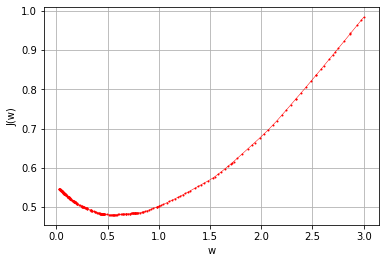

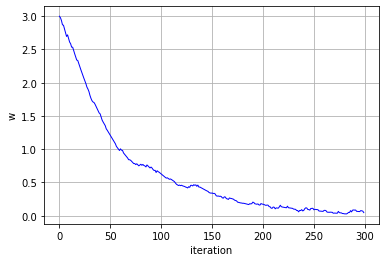

In [33]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv
import itertools

class Stochastic_Gradient_Decent:
    def __init__(self):
        # data number
        self.n = 40
        # noise
        self.omega = np.random.randn()
        self.noise = np.random.randn(self.n)
        # 正則化項の係数
        self.lamda = 0.01
        # 重み
        self.w = 3
        # iteration number
        self.iteration = 300
        # 2次元入出力データ
        self.x = np.random.randn(self.n, 2)
        self.y = 2 * (self.omega * self.x[:, 0] + self.x[:, 1] + self.noise > 0) - 1
    
    def main(self):
        self.w_stack    = []
        self.eval_stack = []
        lip = 7.0 * np.max(self.x[:, 0] ** 2)
        
        for t in range(self.iteration):
            J = 1 / self.n * np.sum(np.maximum(0, 1 - self.y * (self.w * self.x[:, 0] + self.x[:, 1]))) + self.lamda * (self.w ** 2 + 1)
            self.eval_stack.append(J)
            self.w_stack.append(self.w)
            
            zt = np.random.randint(self.n)
            ywx_zt = self.y[zt] * (self.w * self.x[zt, 0] + self.x[zt, 1])
            
            if ywx_zt < 1.0:
                diff_w = - self.y[zt] * self.x[zt, 1]
            else:
                diff_w = 0
            
            self.w = self.w - 1 / lip * diff_w - 2 * self.lamda * self.w
        
        self.w_stack    = np.vstack(self.w_stack)
        self.eval_stack = np.vstack(self.eval_stack)
        
    def DrowGraph(self):
        # Drow Graph
        plt.figure(1)
        plt.plot(self.w_stack, self.eval_stack , 'ro-', markersize = 1, linewidth = 0.5)
        plt.xlabel("w")
        plt.ylabel("J(w)")
        plt.grid()
        
        plt.figure(2)
        plt.plot(self.w_stack, 'b-', linewidth = 1)
        plt.xlabel("iteration")
        plt.ylabel("w")
        plt.grid()
        
SGD = Stochastic_Gradient_Decent()
SGD.main()
SGD.DrowGraph()